# Assignment No.04

# Title of the Assignment: Recurrent Neural Network (RNN) for Time Series Prediction

## Objective:
- Implement a **Recurrent Neural Network (RNN)** using historical stock price data.
- Use the **Google Stock Price** dataset for time series forecasting.
- Understand the concepts behind RNNs and how they are applied in time series prediction.


In [8]:
#step 1:import important libraries
# Suppress warnings and logs
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# TensorFlow/Keras modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


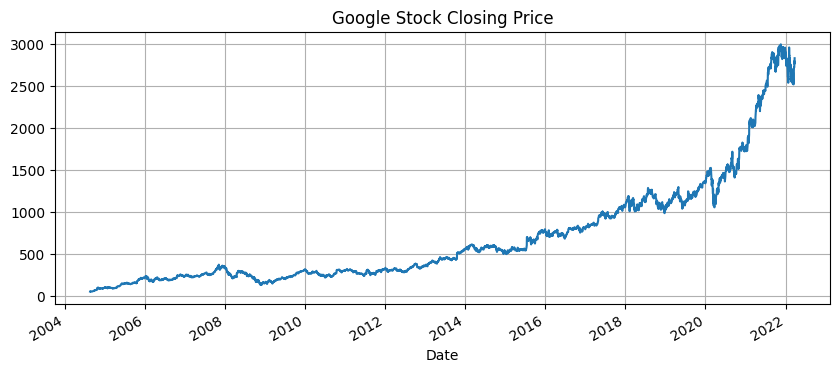

In [9]:
#step 2:Load and visualize the dataset
# Load Google stock dataset (GOOGL.csv)
df = pd.read_csv("GOOGL.csv")
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot closing prices
df['Close'].plot(title="Google Stock Closing Price", figsize=(10, 4))
plt.grid(True)
plt.show()


In [10]:
#step 3:prepare the data
# Normalize closing prices
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

# Create sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [11]:
#Step 4: Build the RNN Model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)


Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4612e-05 - val_loss: 7.5853e-04
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8746e-05 - val_loss: 7.1255e-04
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7395e-05 - val_loss: 4.5172e-04
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8927e-05 - val_loss: 3.5573e-04


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083    
Test Loss (MSE): 0.035481
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


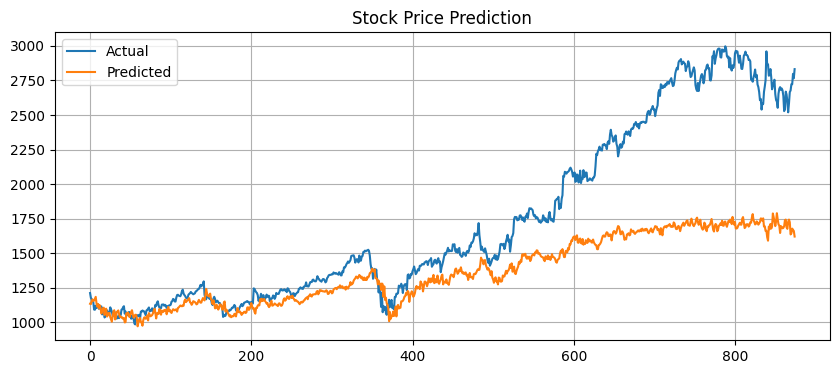

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Next Day Price: $1656.18


In [13]:
#Step 6: Make Predictions and Forecast
# Evaluate and predict
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.6f}")

predicted = model.predict(X_test)
actual = scaler.inverse_transform(y_test)
predicted_prices = scaler.inverse_transform(predicted)

# Plot predictions
plt.figure(figsize=(10, 4))
plt.plot(actual, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.title("Stock Price Prediction")
plt.legend()
plt.grid(True)
plt.show()

# Predict next day
last_seq = scaled_data[-60:].reshape(1, 60, 1)
next_day_price = scaler.inverse_transform(model.predict(last_seq))
print(f"Predicted Next Day Price: ${next_day_price[0][0]:.2f}")
